 Carregando Dataset

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
base_info = pd.read_csv('ml-100k/u.info', header=None)
print("Detalhes dos usuários, itens e votos, carregados do dataset:  ",list(base_info[0]))

Detalhes dos usuários, itens e votos, carregados do dataset:   ['943 users', '1682 items', '100000 ratings']


In [6]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 
     

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:

len(dataset), max(dataset['movie id']),min(dataset['movie id'])
     

(100000, 1682, 1)

In [8]:

d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [9]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merging required datasets

In [11]:

merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [12]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [13]:
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


In [14]:

rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df
     

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

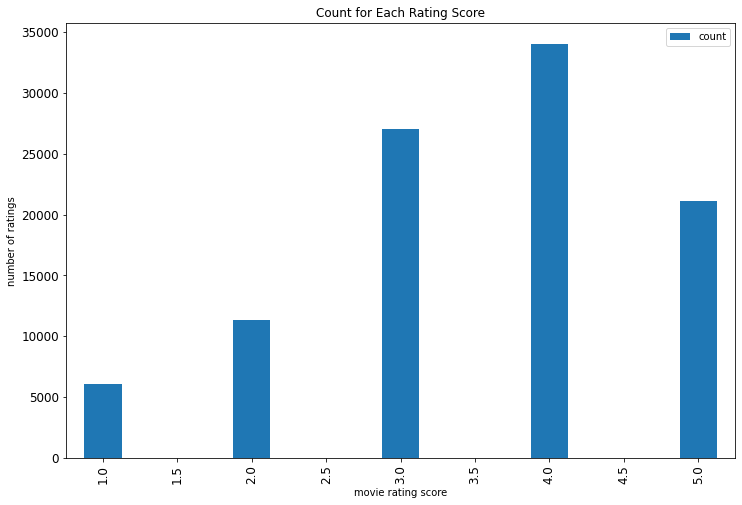

In [15]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [16]:

total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [17]:

# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

C:\Users\jvtsp\AppData\Local\Temp\ipykernel_5508\1015737418.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count_df = rating_count_df.append(


,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [18]:
# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.0,1469459,14.200405
1.0,6083,8.713253
1.5,3,1.098612
2.0,11334,9.335562
2.5,6,1.791759
3.0,27060,10.205812
3.5,19,2.944439
4.0,34042,10.435350
4.5,16,2.772589
5.0,21130,9.958449


In [19]:

rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


Text(0, 0.5, 'number of ratings')

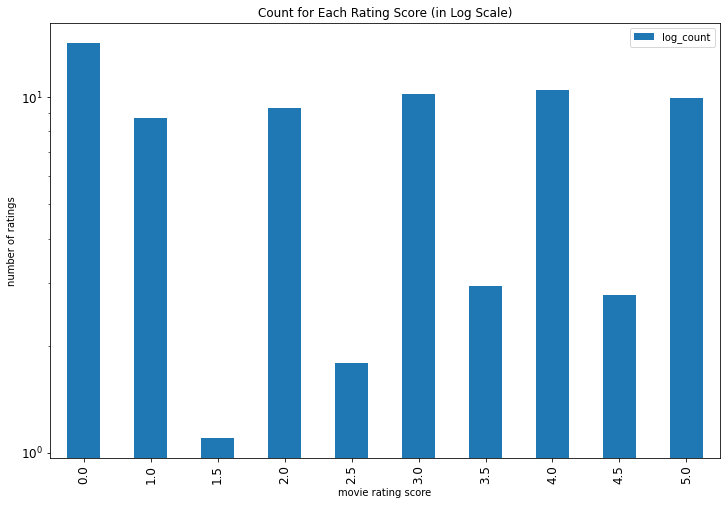

In [20]:
ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [21]:
refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [22]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=['count'])
movies_count_df.head()

,count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

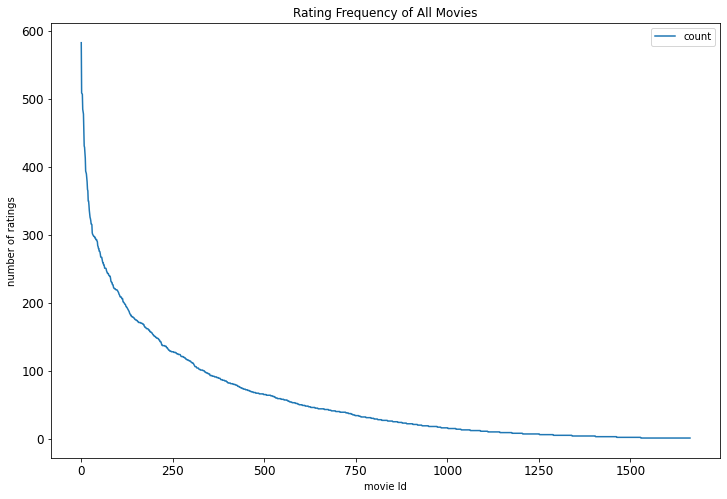

In [23]:

# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [24]:
from recomendacao import *
base = carregaMovieLens()

KeyError: 'Usuario 1'

In [ ]:
#Retornar os usuários mais parecidos com o usuário: 
getSimilares(base, '196')

[(1.0, '935'),
 (1.0, '93'),
 (1.0, '905'),
 (1.0, '88'),
 (1.0, '879'),
 (1.0, '876'),
 (1.0, '841'),
 (1.0, '811'),
 (1.0, '80'),
 (1.0, '776'),
 (1.0, '744'),
 (1.0, '706'),
 (1.0, '681'),
 (1.0, '67'),
 (1.0, '626'),
 (1.0, '61'),
 (1.0, '598'),
 (1.0, '581'),
 (1.0, '557'),
 (1.0, '531'),
 (1.0, '516'),
 (1.0, '512'),
 (1.0, '462'),
 (1.0, '46'),
 (1.0, '403'),
 (1.0, '372'),
 (1.0, '36'),
 (1.0, '359'),
 (1.0, '322'),
 (1.0, '319')]

In [3]:
#Retornar recomendacoes para o usuario
getRecomendacoesUsuario(base, '196')

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, "Someone Else's America (1995)"),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Prefontaine (1997)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Aiqing wansui (1994)'),
 (4.704064767288933, 'Letter From Death Row, A (1998)'),
 (4.658734651673481, 'Faust (1994)'),
 (4.597656036653419, 'Pather Panchali (1955)'),
 (4.589844333644606, "Some Mother's Son (1996)"),
 (4.537703009757187, 'Close Shave, A (1995)'),
 (4.527950777814402, 'Maya Lin: A Strong Clear Vision (1994)'),
 (4.52186579870028, 'Anna (1996)'),
 (4.4998260696517836, "Schindler's List (1993)"),
 (4.496946017730404, 'Casablanca (1942)'),
 (4.480597587292746, 'Shawshank Redemption, The (1994)'),
 (4.431036838741084, 'Wrong Trousers, The (1993)'),
 (4.42867141204433, 'Wallace & Gromit: The B

In [5]:
calculaItensSimilares(base)

{'196': [(1.0, '935'),
  (1.0, '93'),
  (1.0, '905'),
  (1.0, '88'),
  (1.0, '879'),
  (1.0, '876'),
  (1.0, '841'),
  (1.0, '811'),
  (1.0, '80'),
  (1.0, '776'),
  (1.0, '744'),
  (1.0, '706'),
  (1.0, '681'),
  (1.0, '67'),
  (1.0, '626'),
  (1.0, '61'),
  (1.0, '598'),
  (1.0, '581'),
  (1.0, '557'),
  (1.0, '531'),
  (1.0, '516'),
  (1.0, '512'),
  (1.0, '462'),
  (1.0, '46'),
  (1.0, '403'),
  (1.0, '372'),
  (1.0, '36'),
  (1.0, '359'),
  (1.0, '322'),
  (1.0, '319')],
 '186': [(1.0, '861'),
  (1.0, '469'),
  (1.0, '172'),
  (0.5, '912'),
  (0.5, '909'),
  (0.5, '765'),
  (0.5, '736'),
  (0.5, '692'),
  (0.5, '321'),
  (0.5, '273'),
  (0.5, '187'),
  (0.4142135623730951, '572'),
  (0.4142135623730951, '553'),
  (0.4142135623730951, '51'),
  (0.4142135623730951, '481'),
  (0.4142135623730951, '473'),
  (0.4142135623730951, '426'),
  (0.4142135623730951, '369'),
  (0.4142135623730951, '266'),
  (0.4142135623730951, '237'),
  (0.36602540378443865, '776'),
  (0.36602540378443865, '4

In [28]:
from recomendacao import *
base = carregaMovieLens()
base_teste = criaBaseTeste(num_usuarios=10, num_itens=20, num_avaliacoes=5)

print(base_teste)
# recomendacoes_usuario = getRecomendacoesUsuario(base_teste, usuario)
# recomendacoes_itens = getRecomendacoesItens(base, calculaItensSimilares(base), usuario)

{'Usuario 1': {'Item 1': 5, 'Item 2': 2, 'Item 3': 1, 'Item 4': 5, 'Item 5': 2}, 'Usuario 2': {'Item 1': 4, 'Item 2': 5, 'Item 3': 5, 'Item 4': 2, 'Item 5': 4}, 'Usuario 3': {'Item 1': 1, 'Item 2': 1, 'Item 3': 2, 'Item 4': 3, 'Item 5': 5}, 'Usuario 4': {'Item 1': 2, 'Item 2': 4, 'Item 3': 4, 'Item 4': 4, 'Item 5': 2}, 'Usuario 5': {'Item 1': 3, 'Item 2': 5, 'Item 3': 4, 'Item 4': 1, 'Item 5': 5}, 'Usuario 6': {'Item 1': 1, 'Item 2': 4, 'Item 3': 4, 'Item 4': 1, 'Item 5': 3}, 'Usuario 7': {'Item 1': 5, 'Item 2': 1, 'Item 3': 1, 'Item 4': 4, 'Item 5': 2}, 'Usuario 8': {'Item 1': 1, 'Item 2': 2, 'Item 3': 1, 'Item 4': 1, 'Item 5': 4}, 'Usuario 9': {'Item 1': 2, 'Item 2': 5, 'Item 3': 2, 'Item 4': 5, 'Item 5': 3}, 'Usuario 10': {'Item 1': 1, 'Item 2': 2, 'Item 3': 2, 'Item 4': 3, 'Item 5': 3}}


KeyError: 'Usuario 1'